# Loan Application Status Prediction
- Problem Statement:
- This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

*  Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

*  Dependent Variable (Target Variable):

- Loan_Status

- You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'C:\Users\tusha\Downloads\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Target variable
- Our target variable is Loan_Status.
- It is a categorical variable.

In [3]:
# To display the row and columns of the dataframe.
df.shape

(614, 13)

In [4]:
# To display the columns present in the dataframe.
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# To check the datatypes of the columns.
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# To check the missing values present in the dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# We have missing values in Gender,Married,Dependents,Self_Employed, LoanAmount,Loan_Amount_Term and Credit_history

In [8]:
df.count(axis=0)

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

<AxesSubplot:title={'center':'Heatmap Null values'}>

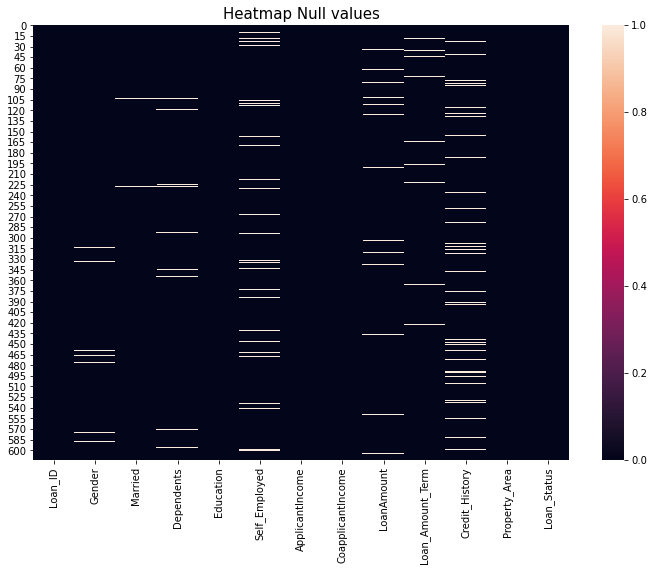

In [9]:
# to check the missing values using the heatmap
plt.figure(figsize=(12,8))
plt.title('Heatmap Null values',fontsize=15)
sns.heatmap(df.isnull())

In [10]:
# above we can see the missing values.

In [11]:
df.describe()
# This will not include the categorical variables.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# Statistical summary of the dataset
df.describe(include='all')
# by using all it can be assured that categorical features are also included.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001068,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [13]:
# from describe function also we get to know that there are missing values in the dataset.
# There is a large difference between mean and median.
# The minimum value for CoapplicatIncome and Credit_History is 0
# The minimum loan amount is 0 and the maximum loan amount is 700.
# The difference between mean and median in Credit_history is very less diffenrece
# It can be observed that the data is skewed towards left and right.
# Applicant Income, coapplicat income are right skewed because mean is greater than median values.
# Loan amount and loan amount term are left skewed because median is greater than mean values.
# It can infered that there are outliers present in our dataset because difference between the values of 3rd quantile and maximum values is more.

In [14]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [16]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
# Loan status for yes is 422 and for no is 192

In [18]:
# checking the counts for credit history.
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

In [19]:
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [20]:
# Loan status yes is 68.72%
# Loan Status no is 31.27%

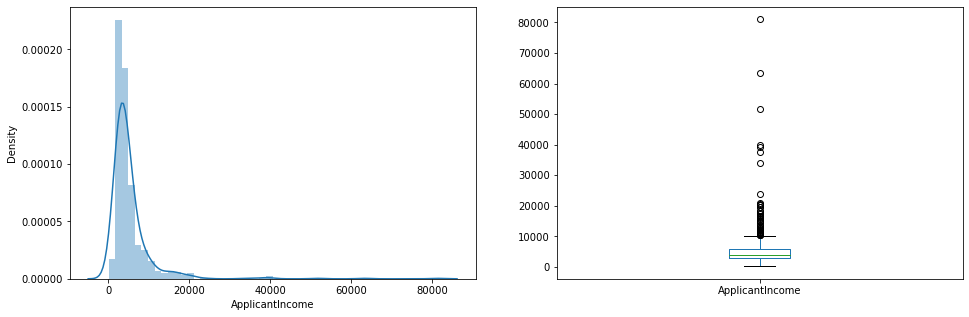

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["ApplicantIncome"]);

plt.subplot(122)
df["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [22]:
# From the plot it can be inferred that the applicant income is not normally distributed as it has been toward left side.
# From boxplot it can be seen that there is a lot of outliers present.

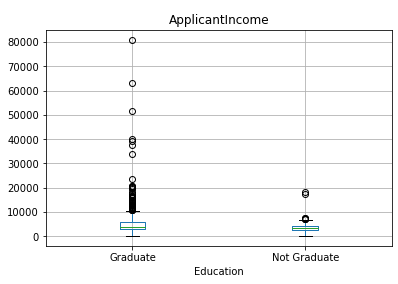

In [23]:
df.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

In [24]:
# Graduates are higher in number with higher income.
# in graduates there is too much outliers present.

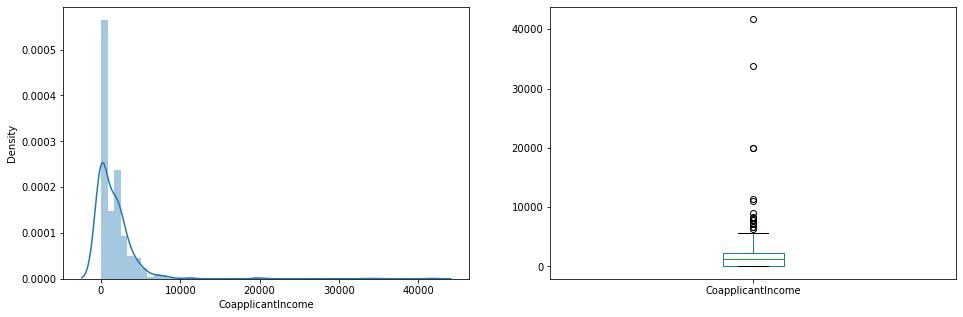

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["CoapplicantIncome"]);

plt.subplot(122)
df["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [26]:
# income range is majorly distributed from 0 to 5000.
# From the boxplot it can be seen that there is too much outliers present.

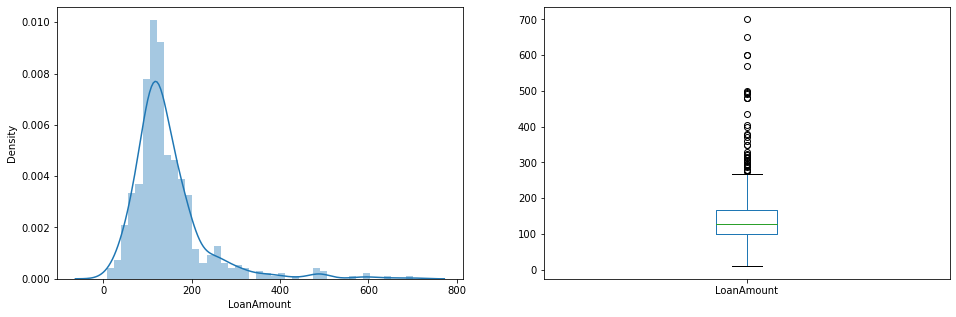

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [28]:
# from plot it can be seen that there are lot of outliers present.

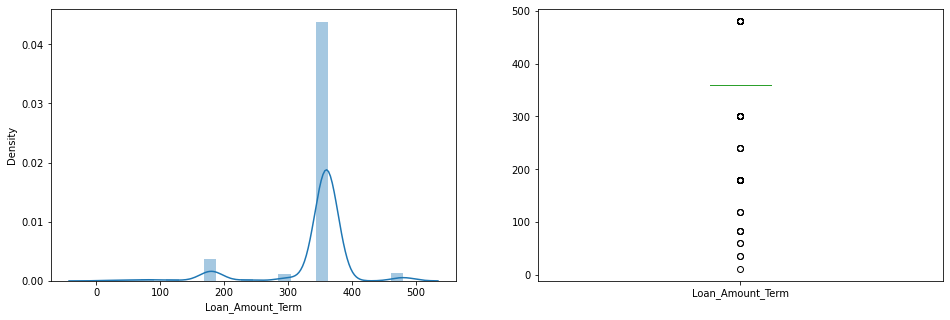

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

In [30]:
# In plot it can be seen that there is a lot of outliers present 
# the distribution is somewhat normal.

In [31]:
df.Gender=df.Gender.fillna(df.Gender.mode()[0])

In [32]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [33]:
df.Dependents=df.Dependents.fillna(df.Dependents.mode()[0])

In [34]:
df.Self_Employed=df.Self_Employed.fillna(df.Self_Employed.mode()[0])

In [35]:
df.Credit_History=df.Credit_History.fillna(df.Credit_History.mode()[0])

In [36]:
# filling the missing values
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [37]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0])

In [38]:
# to check whether the missing values has been filled 
print(df['LoanAmount'].count())
print(df['Loan_Amount_Term'].count())

614
614


In [39]:
df.groupby('ApplicantIncome').mean()[:5]
df.groupby('Married').get_group('Yes')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


<AxesSubplot:>

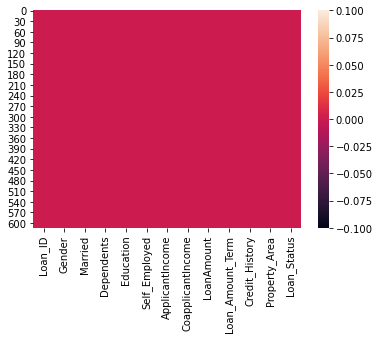

In [40]:
sns.heatmap(df.isnull())

In [41]:
# We have sucessfully removed all our null values.Now there is no missing values

In [42]:
# To check the correlation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap'}>

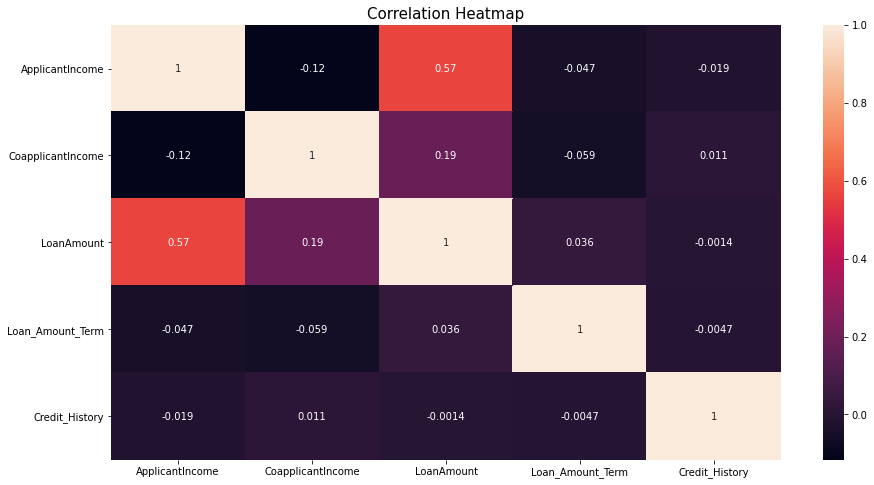

In [43]:
## correlation Plot
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True)

In [44]:
# Loan amount is highly correlated with applicant income 

<AxesSubplot:xlabel='Gender', ylabel='count'>

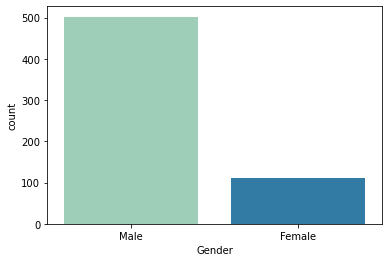

In [45]:
sns.countplot(df['Gender'],palette='YlGnBu',data=df)

In [46]:
# above plot shows that there are more male applicants

<AxesSubplot:xlabel='Married', ylabel='count'>

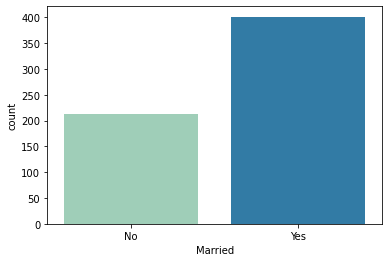

In [47]:
sns.countplot(df['Married'],palette='YlGnBu',data=df)

In [48]:
# Married applicants are more than unmarried.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

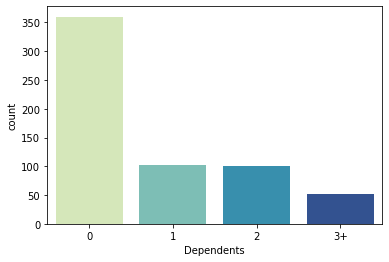

In [49]:
sns.countplot(df['Dependents'],palette='YlGnBu',data=df)

In [50]:
# There are more applicants who have no dependents in our dataset.

<AxesSubplot:xlabel='Education', ylabel='count'>

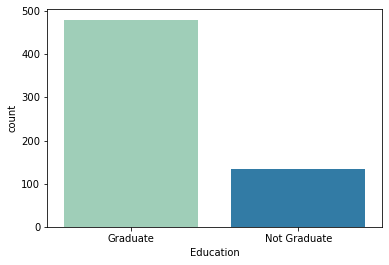

In [51]:
sns.countplot(df['Education'],palette='YlGnBu',data=df)

In [52]:
# Non Graduate applicants are very less as compared to graduate.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

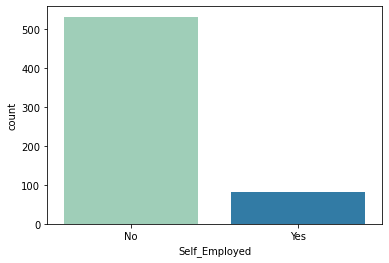

In [53]:
sns.countplot(df['Self_Employed'],palette='YlGnBu',data=df)

In [54]:
# slef employed are very less for Loan applicants.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

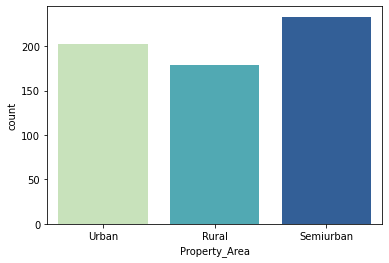

In [55]:
sns.countplot(df['Property_Area'],palette='YlGnBu',data=df)

In [56]:
# semi-urban loan applicants are more than urban and rural.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

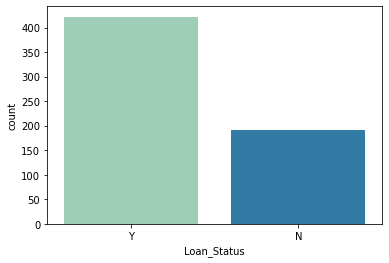

In [57]:
sns.countplot(df['Loan_Status'],palette='YlGnBu',data=df)

In [58]:
# In majority cases loan status is yes as compared to no.

# Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

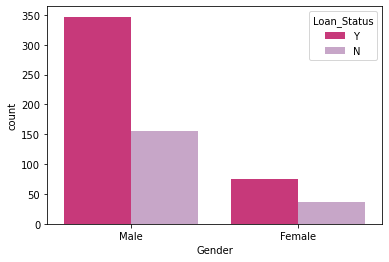

In [59]:
sns.countplot(df['Gender'],palette='PuRd_r',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

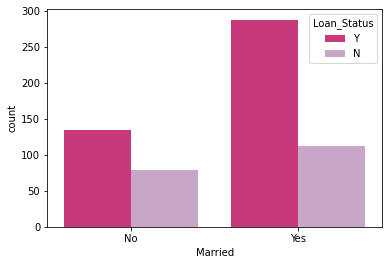

In [60]:
sns.countplot(df['Married'],palette='PuRd_r',hue='Loan_Status',data=df)

In [61]:
# married applicants whose loans have been are less than 300 but more than 250 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

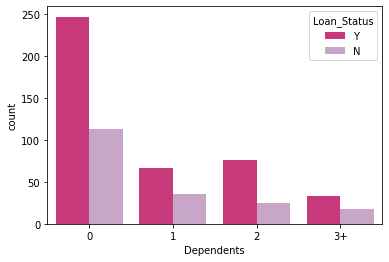

In [62]:
sns.countplot(df['Dependents'],palette='PuRd_r',hue='Loan_Status',data=df)

In [63]:
# Majority of the applicants whose loans are approved have no dependent.

<AxesSubplot:xlabel='Education', ylabel='count'>

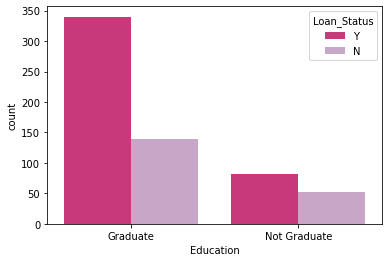

In [64]:
sns.countplot(df['Education'],palette='PuRd_r',hue='Loan_Status',data=df)

In [65]:
# Graduate whose loans have been approved are more than the non graduates.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

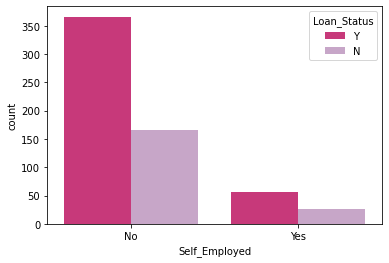

In [66]:
sns.countplot(df['Self_Employed'],palette='PuRd_r',hue='Loan_Status',data=df)

In [67]:
# the number of self employed applicants who have been 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

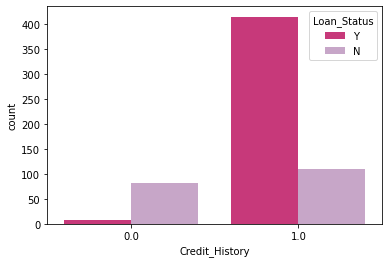

In [68]:
sns.countplot(df['Credit_History'],palette='PuRd_r',hue='Loan_Status',data=df)

In [69]:
# those who have credit_histroy 0 are the one who has been denied the loan grant.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

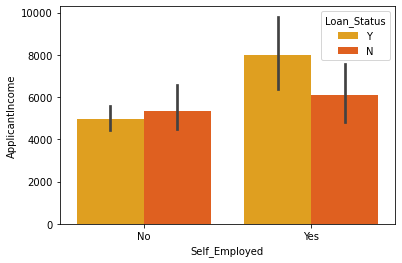

In [70]:
sns.barplot(y='ApplicantIncome',x='Self_Employed',hue='Loan_Status',palette='autumn_r',data=df)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

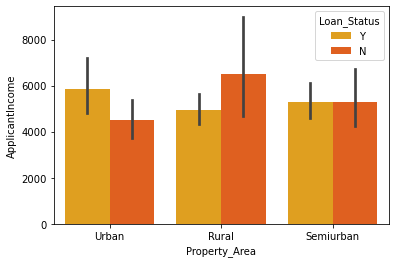

In [71]:
sns.barplot(y='ApplicantIncome',x='Property_Area',hue='Loan_Status',palette='autumn_r',data=df)
plt.plot

In [72]:
# urban applicant getting the loan approved.
# in rural loan rejected are more.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

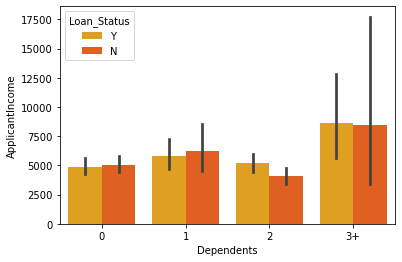

In [73]:
sns.barplot(y='ApplicantIncome',x='Dependents',hue='Loan_Status',palette='autumn_r',data=df)
plt.plot

In [74]:
# Dependents who have dependents more than 3 whose loan status have been approved.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

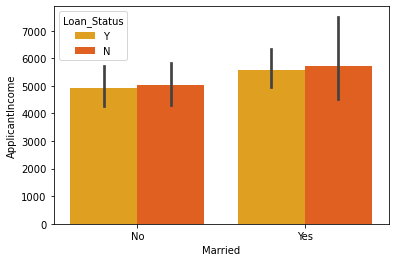

In [75]:
sns.barplot(y='ApplicantIncome',x='Married',hue='Loan_Status',palette='autumn_r',data=df)
plt.plot

In [76]:
# Applicants who are married thiers loans have been approved is low as compared to whose loans have been rejected.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

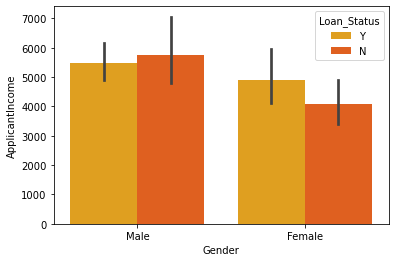

In [77]:
sns.barplot(y='ApplicantIncome',x='Gender',hue='Loan_Status',palette='autumn_r',data=df)
plt.plot

In [78]:
# loan status of males are approved more thanthe females whose loan status have been approved.

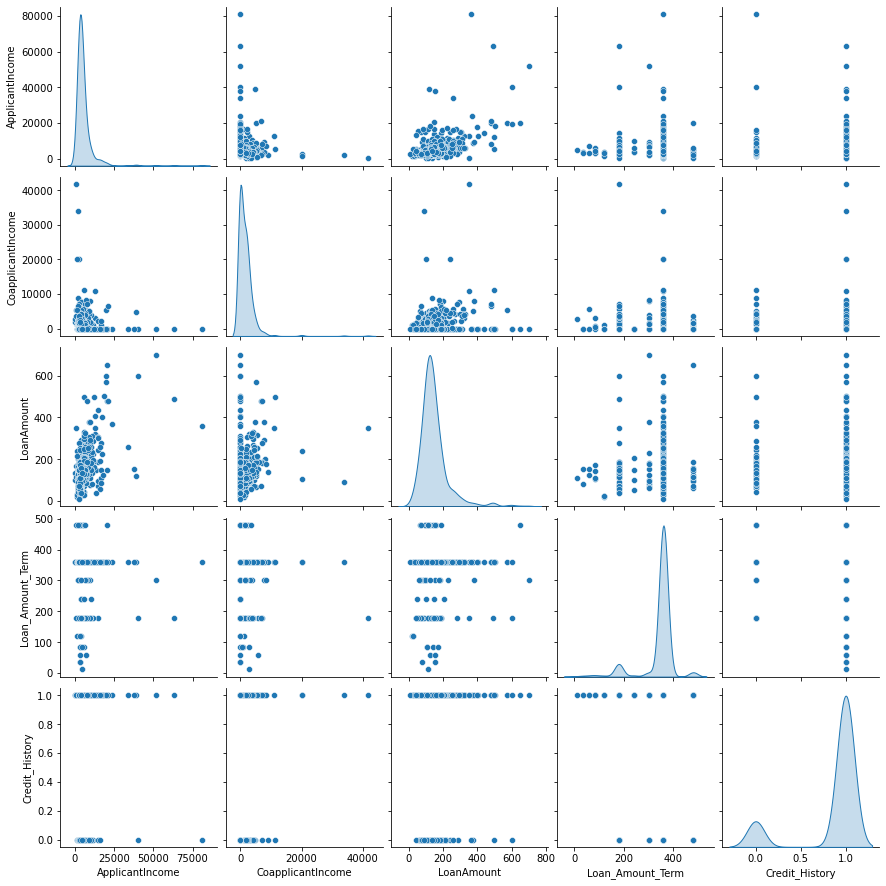

In [79]:
# Plotting a pair plot
sns.pairplot(df,diag_kind='kde')

## Outliers Removal

<AxesSubplot:>

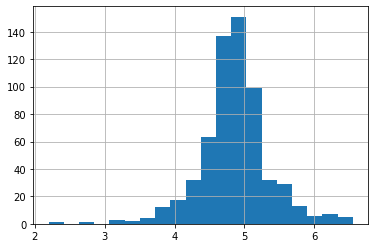

In [80]:
# to remove outliers we can use log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

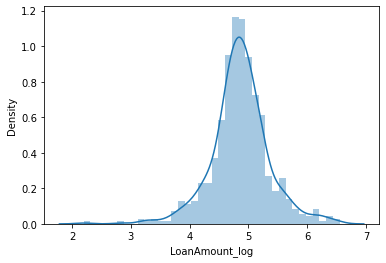

In [81]:
sns.distplot(df['LoanAmount_log'])

<AxesSubplot:xlabel='ApplicantIncome_log', ylabel='Density'>

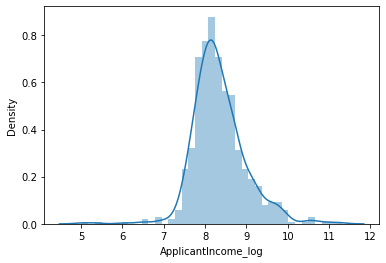

In [82]:
df["ApplicantIncome_log"]=np.log(df["ApplicantIncome"])
sns.distplot(df["ApplicantIncome_log"])

In [83]:
# Now distribution is close to normal

In [84]:
df=df.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [85]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,7.856707
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y,4.262680,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y,3.688879,8.320205
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y,5.533389,8.996157
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y,5.231109,8.933664


### Skew

In [86]:
df1=df.copy()

In [87]:
df1.skew()

Credit_History        -2.021971
LoanAmount_log        -0.223227
ApplicantIncome_log    0.479580
dtype: float64

In [88]:
df1['LoanAmount_log']=np.sqrt(df1['LoanAmount_log'])

In [89]:
df1['Credit_History']=np.sqrt(df1['Credit_History'])

In [90]:
df1['ApplicantIncome_log']=np.sqrt(df1['ApplicantIncome_log'])

In [91]:
df1.skew()

Credit_History        -2.021971
LoanAmount_log        -0.649808
ApplicantIncome_log    0.132031
dtype: float64

## Label Encoder

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [93]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'ApplicantIncome_log'],
      dtype='object')

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    object 
 2   Married              614 non-null    object 
 3   Dependents           614 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        614 non-null    object 
 6   Credit_History       614 non-null    float64
 7   Property_Area        614 non-null    object 
 8   Loan_Status          614 non-null    object 
 9   LoanAmount_log       614 non-null    float64
 10  ApplicantIncome_log  614 non-null    float64
dtypes: float64(3), object(8)
memory usage: 52.9+ KB


In [95]:
df1[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']]=df1[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']].apply(le.fit_transform)

In [96]:
df1.Loan_Status=le.fit_transform(df.Loan_Status)

In [97]:
df1.drop('Loan_ID',axis=1,inplace=True)

In [98]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,1,0,0,0,0,1.0,2,1,2.233031,2.945170
1,1,1,1,0,0,1.0,0,0,2.202732,2.903465
2,1,1,0,0,1,1.0,2,1,2.046865,2.829553
3,1,1,0,1,0,1.0,2,1,2.188034,2.802982
4,1,0,0,0,0,1.0,2,1,2.224581,2.949494


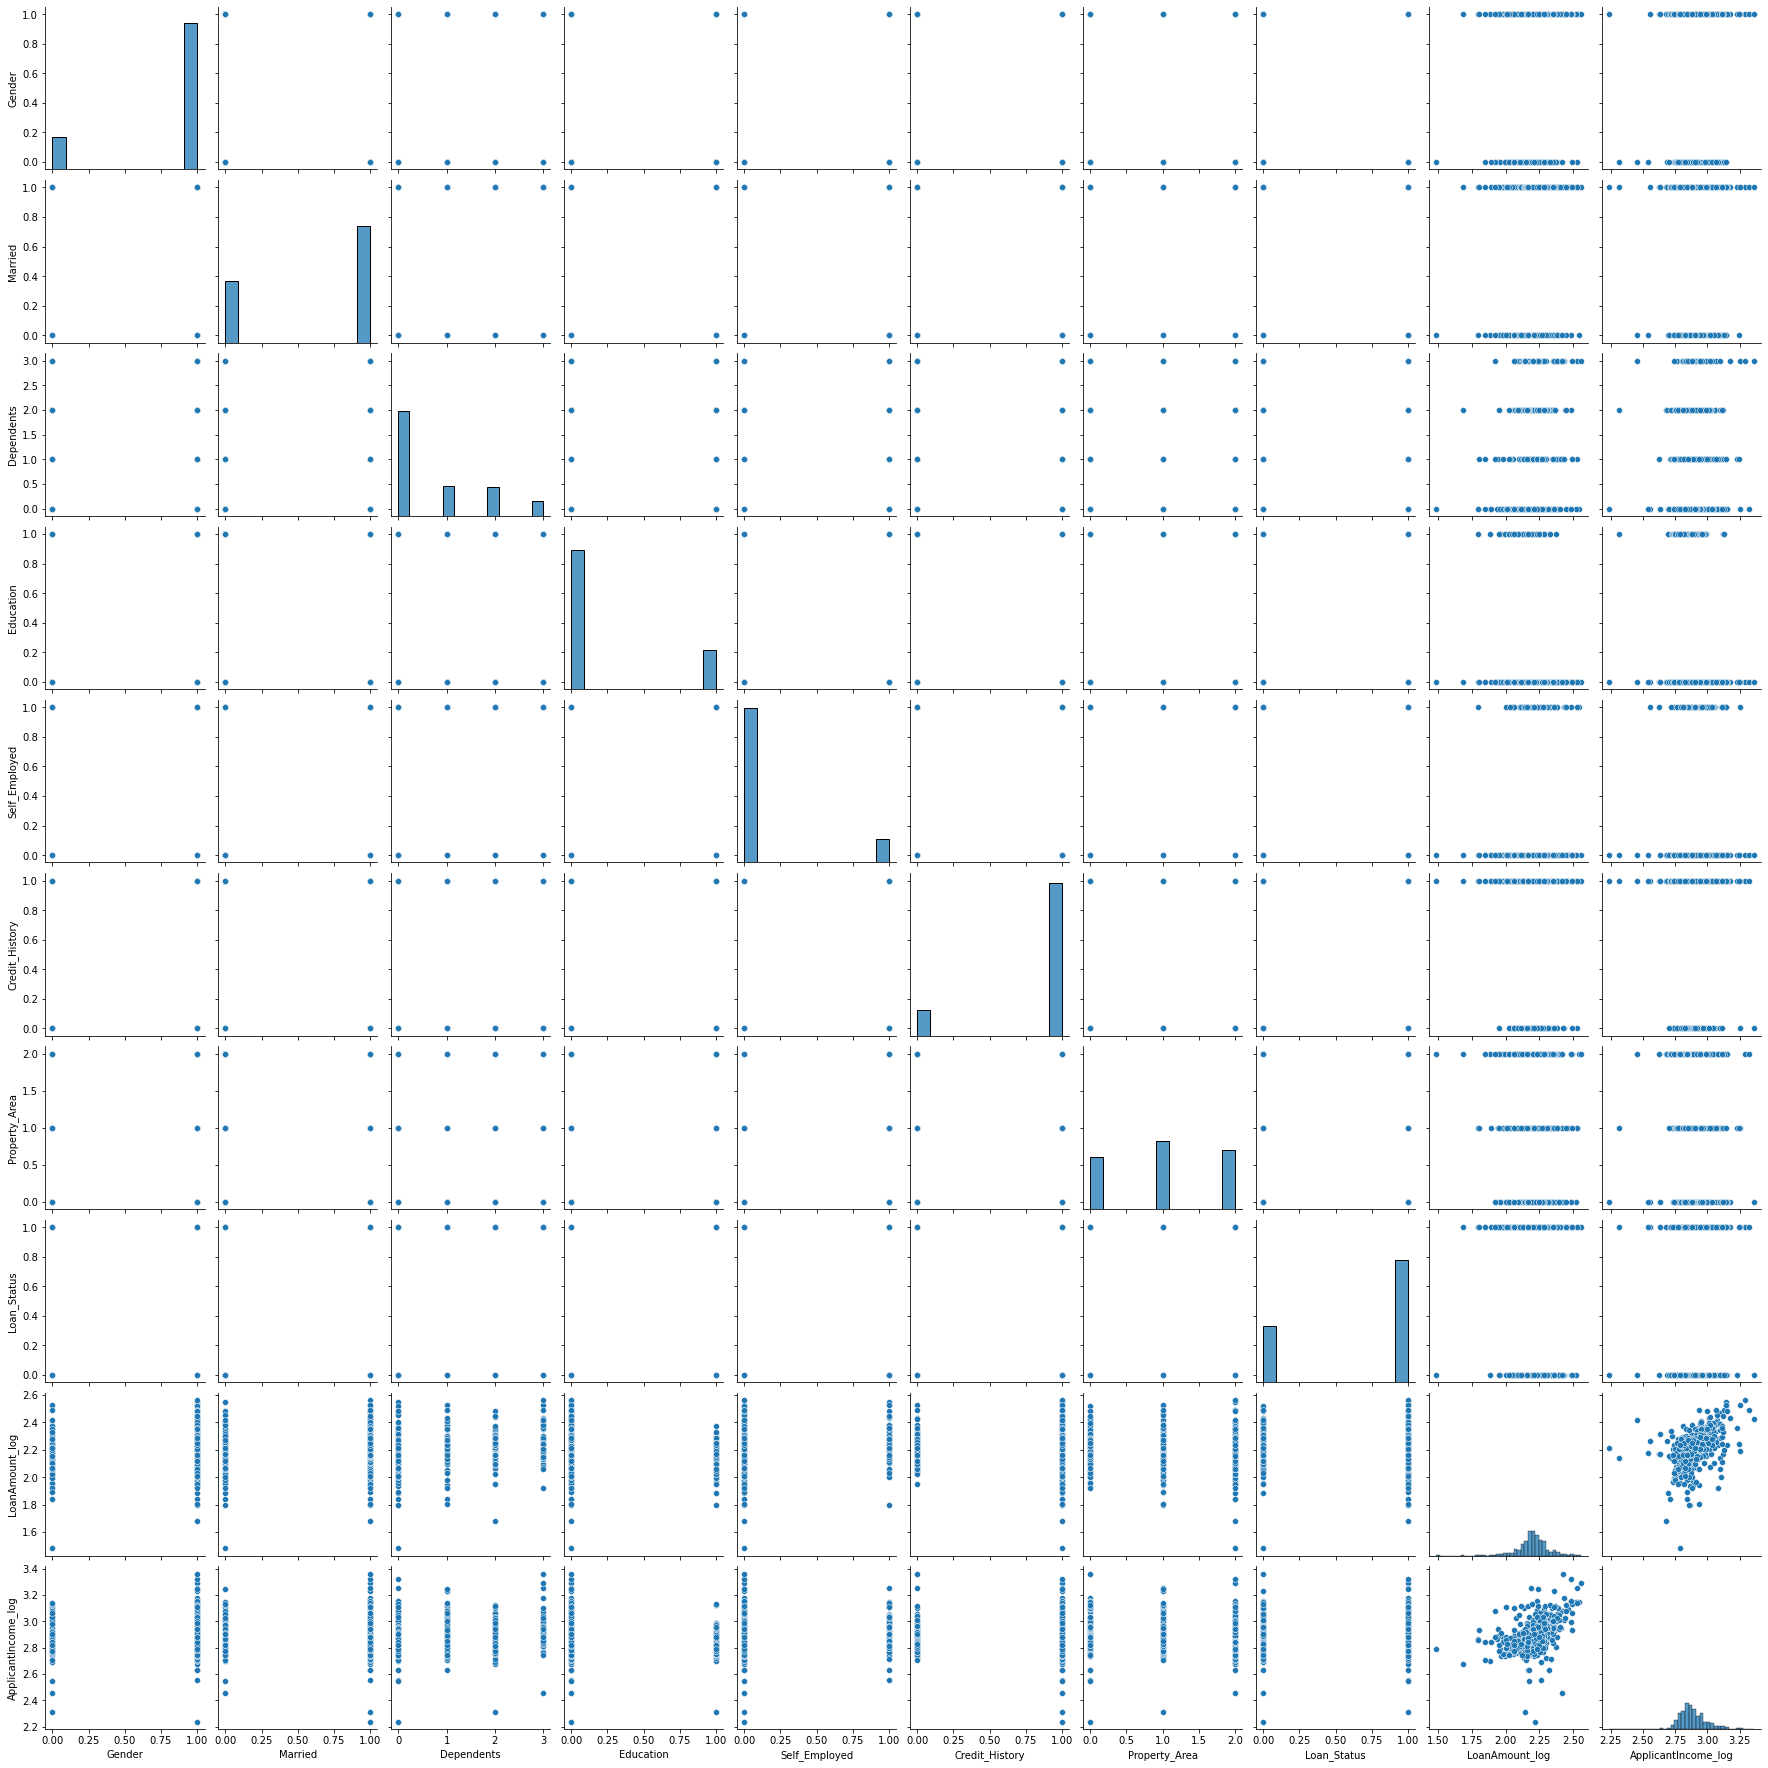

In [99]:
sns.pairplot(df1)

In [100]:
# The dataset is normally distributed.

In [101]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.009170,-0.025752,0.017987,0.146050,0.086261
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.010938,0.004257,0.091478,0.180086,0.018726
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,-0.040160,-0.000244,0.010118,0.152482,0.113325
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.073658,-0.065243,-0.085884,-0.136077,-0.179542
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.001550,-0.030860,-0.003700,0.106854,0.187087
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,1.000000,0.001963,0.540556,-0.022586,0.012795
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,0.001963,1.000000,0.032112,-0.097122,-0.029203
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,0.540556,0.032112,1.000000,-0.040395,0.012657
LoanAmount_log,0.146050,0.180086,0.152482,-0.136077,0.106854,-0.022586,-0.097122,-0.040395,1.000000,0.466993
ApplicantIncome_log,0.086261,0.018726,0.113325,-0.179542,0.187087,0.012795,-0.029203,0.012657,0.466993,1.000000


<AxesSubplot:>

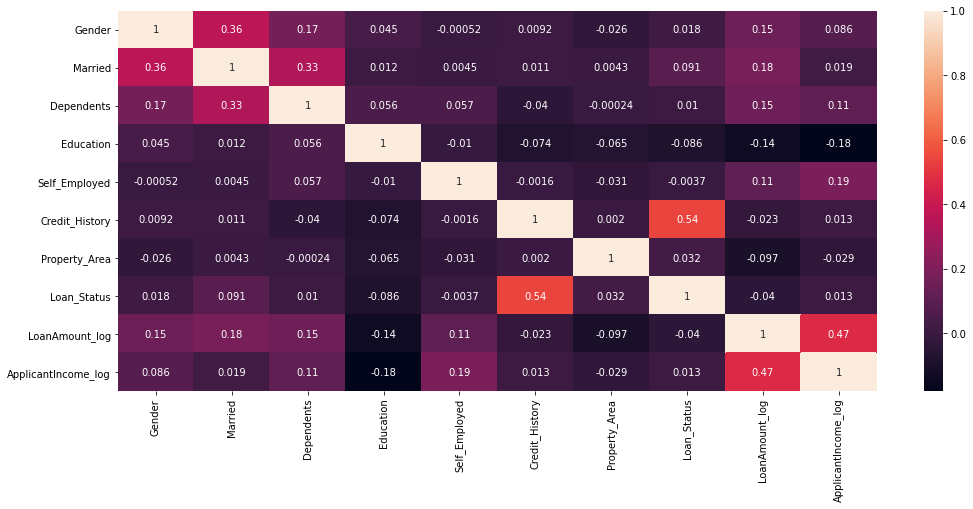

In [102]:
plt.figure(figsize=(17,7))
sns.heatmap(df1.corr(),annot=True)

## Model building using SelectPerventile features

In [103]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

## Splitting data

In [104]:
# Instantiate SelectPercentile and fit (feature, Label)
X=df1.drop(['Loan_Status'],axis=1)
y=df1.Loan_Status

SPercentile = SelectPercentile(score_func=chi2, percentile=80)

sPercentile = SPercentile.fit(X,y)

In [105]:
# Seperate the feature to check p-values
cols = SPercentile.get_support(indices=True)
features = X.columns[cols]

In [106]:
chi_scores = chi2(X,y)

In [107]:
chi_scores

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 2.60058772e+01, 3.77837464e-01, 5.95078838e-03,
        4.22151805e-04]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 3.40379591e-07, 5.38762867e-01, 9.38511096e-01,
        9.83607551e-01]))

In [108]:
chi_scores = pd.DataFrame({'features': X.columns, 'Chi2': SPercentile.scores_, 'pValue': SPercentile.pvalues_})
chi_scores.sort_values(by='Chi2', ascending=False)

,features,Chi2,pValue
5,Credit_History,26.005877,3.403796e-07
3,Education,3.540502,5.988732e-02
1,Married,1.782425,1.818518e-01
6,Property_Area,0.377837,5.387629e-01
2,Dependents,0.085953,7.693869e-01
0,Gender,0.036234,8.490324e-01
4,Self_Employed,0.007285,9.319823e-01
7,LoanAmount_log,0.005951,9.385111e-01
8,ApplicantIncome_log,0.000422,9.836076e-01


#### Let's print the top 80% features

In [109]:
print(cols)
print(features)

[0 1 2 3 4 5 6]
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')


In [110]:
df1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,1,0,0,0,0,1.0,2,1,2.233031,2.945170
1,1,1,1,0,0,1.0,0,0,2.202732,2.903465
2,1,1,0,0,1,1.0,2,1,2.046865,2.829553
3,1,1,0,1,0,1.0,2,1,2.188034,2.802982
4,1,0,0,0,0,1.0,2,1,2.224581,2.949494
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,2.064626,2.823556
610,1,1,3,0,0,1.0,0,1,1.920646,2.884476
611,1,1,1,0,0,1.0,2,1,2.352316,2.999359
612,1,1,2,0,0,1.0,2,1,2.287162,2.988924


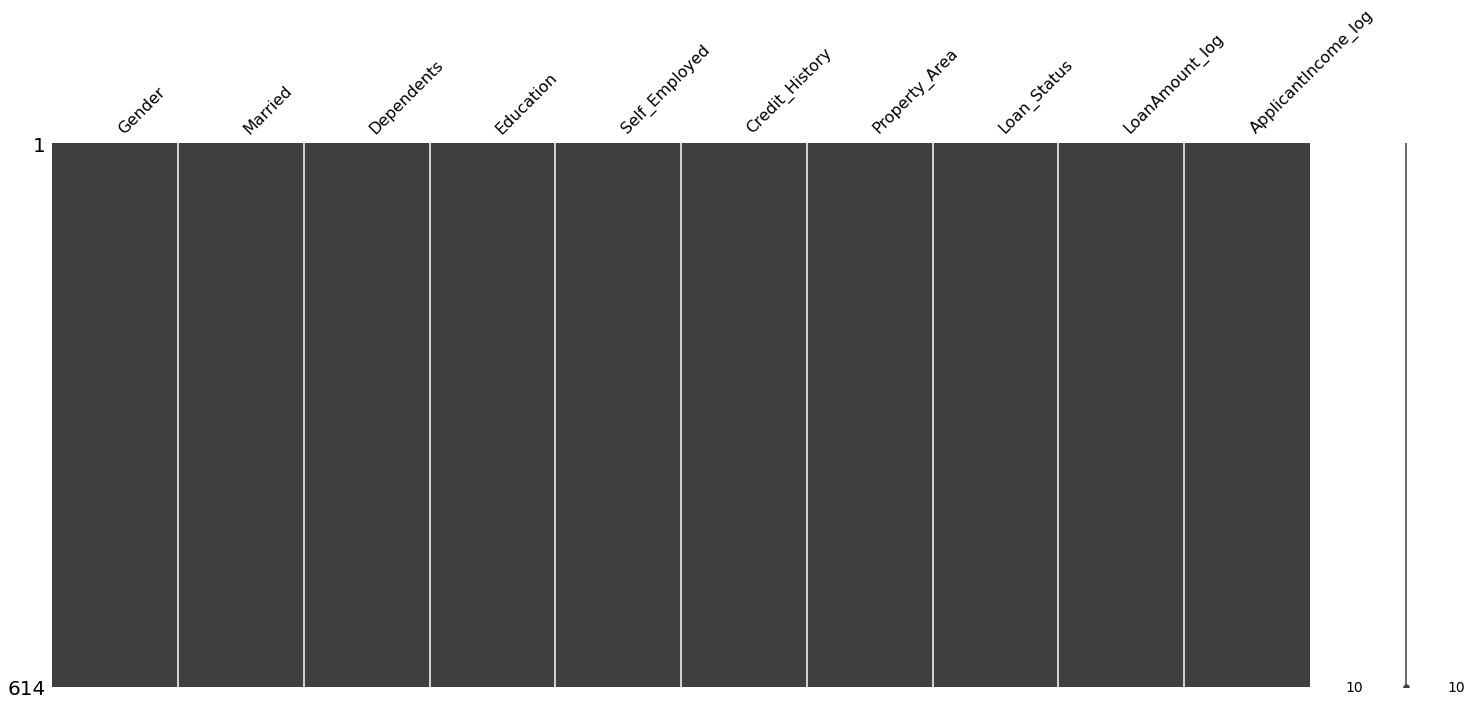

In [111]:
msno.matrix(df1)
plt.show()

In [112]:
# There is no missing values.

In [113]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log
0,1,0,0,0,0,1.0,2,2.233031,2.945170
1,1,1,1,0,0,1.0,0,2.202732,2.903465
2,1,1,0,0,1,1.0,2,2.046865,2.829553
3,1,1,0,1,0,1.0,2,2.188034,2.802982
4,1,0,0,0,0,1.0,2,2.224581,2.949494
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,2.064626,2.823556
610,1,1,3,0,0,1.0,0,1.920646,2.884476
611,1,1,1,0,0,1.0,2,2.352316,2.999359
612,1,1,2,0,0,1.0,2,2.287162,2.988924


In [114]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [115]:
print(X.shape,y.shape)

(614, 9) (614,)


In [116]:
# Target variable
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Feature scaling

In [119]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(X)
X=pd.DataFrame(x_scaled,columns=X.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.411733,1.223298,0.270968,0.531934
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.411733,-1.318513,0.006043,0.157194
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,0.411733,1.223298,-1.356856,-0.506946
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,0.411733,1.223298,-0.122482,-0.745698
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.411733,1.223298,0.197083,0.570787
...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,0.411733,-1.318513,-1.201553,-0.560832
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.411733,-1.318513,-2.460507,-0.013427
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.411733,1.223298,1.313990,1.018853
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.411733,1.223298,0.744286,0.925082


### Feature Importance

In [120]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(X,y)

ExtraTreesClassifier()

In [121]:
print(extra.feature_importances_)

[0.02394522 0.01935309 0.06808555 0.01918134 0.02200271 0.28567709
 0.04822809 0.25688533 0.25664157]


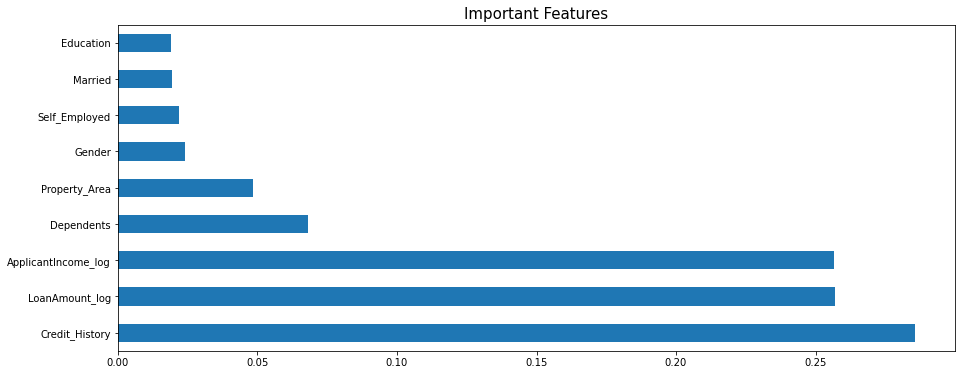

In [122]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [124]:
def max_accuracy_score(clf,X,y):
    max_accuracy=0
    for i in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        #X_train,y_train=SMOTE().fit_resample(X_train,y_train) ##over sampling of our Data
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,X,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,X,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(X_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(X_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

max accuracy score corresponding to 76 is 0.8617886178861789


cross validation score 0.809462881514061


Standard Deviation 0.027383073694490688


F1 score 0.903225806451613


Training accuracy 0.7983706720977597


Test Accuracy 0.8536585365853658


Confusion Matrix [[21 17]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



Roc_auc Score 0.7704334365325077





76

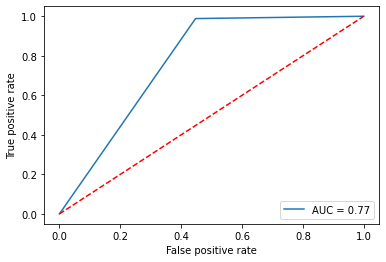

In [125]:
## Logistic Regression
lg=LogisticRegression()
max_accuracy_score(lg,X,y)

max accuracy score corresponding to 51 is 0.7560975609756098


cross validation score 0.6906437425029988


Standard Deviation 0.020203932456082346


F1 score 0.7692307692307693


Training accuracy 1.0


Test Accuracy 0.6829268292682927


Confusion Matrix [[19 19]
 [20 65]]


Classification Report               precision    recall  f1-score   support

           0       0.49      0.50      0.49        38
           1       0.77      0.76      0.77        85

    accuracy                           0.68       123
   macro avg       0.63      0.63      0.63       123
weighted avg       0.69      0.68      0.68       123



Roc_auc Score 0.6323529411764706





51

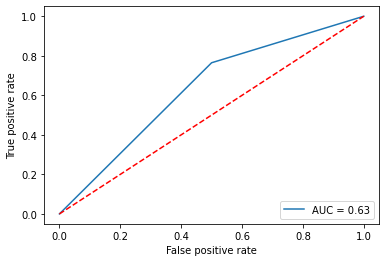

In [126]:
# Decision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,X,y)

max accuracy score corresponding to 42 is 0.8292682926829268


cross validation score 0.7687991470078634


Standard Deviation 0.031944571526080705


F1 score 0.8618784530386742


Training accuracy 0.8065173116089613


Test Accuracy 0.7967479674796748


Confusion Matrix [[20 18]
 [ 7 78]]


Classification Report               precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.81      0.92      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.79      0.80      0.79       123



Roc_auc Score 0.7219814241486069





42

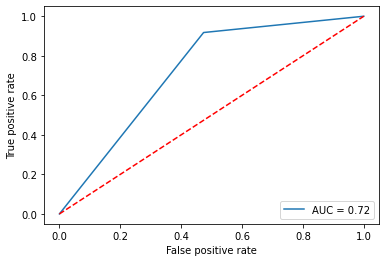

In [127]:
# KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,X,y)

max accuracy score corresponding to 76 is 0.8617886178861789


cross validation score 0.8078368652538984


Standard Deviation 0.024833097529752563


F1 score 0.903225806451613


Training accuracy 0.8004073319755601


Test Accuracy 0.8536585365853658


Confusion Matrix [[21 17]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



Roc_auc Score 0.7704334365325077





76

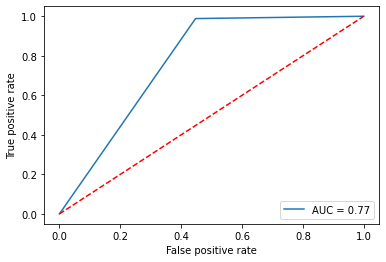

In [128]:
# Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,X,y)

max accuracy score corresponding to 49 is 0.8373983739837398


cross validation score 0.7801679328268692


Standard Deviation 0.025293373845683507


F1 score 0.8700564971751413


Training accuracy 1.0


Test Accuracy 0.8130081300813008


Confusion Matrix [[23 15]
 [ 8 77]]


Classification Report               precision    recall  f1-score   support

           0       0.74      0.61      0.67        38
           1       0.84      0.91      0.87        85

    accuracy                           0.81       123
   macro avg       0.79      0.76      0.77       123
weighted avg       0.81      0.81      0.81       123



Roc_auc Score 0.7555727554179565





49

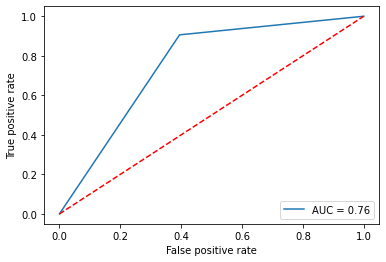

In [129]:
# Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,X,y)

max accuracy score corresponding to 51 is 0.8373983739837398


cross validation score 0.7964414234306278


Standard Deviation 0.020973194181267005


F1 score 0.8901098901098902


Training accuracy 0.8289205702647657


Test Accuracy 0.8373983739837398


Confusion Matrix [[22 16]
 [ 4 81]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.84      0.95      0.89        85

    accuracy                           0.84       123
   macro avg       0.84      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123



Roc_auc Score 0.7659442724458203





51

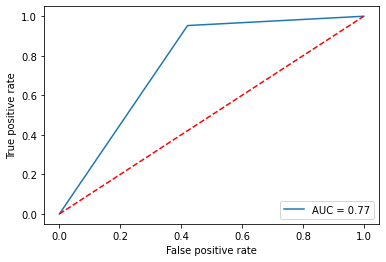

In [130]:
# adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,X,y)

max accuracy score corresponding to 96 is 0.8292682926829268


cross validation score 0.7752632280421166


Standard Deviation 0.03086629478783029


F1 score 0.871508379888268


Training accuracy 0.8778004073319755


Test Accuracy 0.8130081300813008


Confusion Matrix [[22 16]
 [ 7 78]]


Classification Report               precision    recall  f1-score   support

           0       0.76      0.58      0.66        38
           1       0.83      0.92      0.87        85

    accuracy                           0.81       123
   macro avg       0.79      0.75      0.76       123
weighted avg       0.81      0.81      0.81       123



Roc_auc Score 0.748297213622291





96

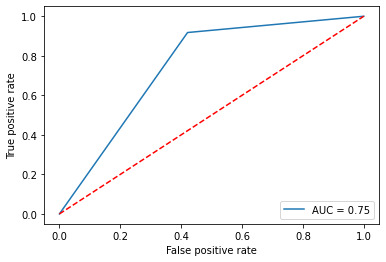

In [131]:
# Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,X,y)

In [132]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNN','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[86.17,76.42,85.36,86.17,84.55,84.55,82.92],
                         'F1_Score':[90.32,79.76,86.95,90.32,86.66,89.50,86.66],
                         'Cross_validation':[80.72,69.70,77.52,80.45,77.52,77.68,77.52]})
best_model

,Model,Accuracy Score,F1_Score,Cross_validation
0,LogisticRegression,86.17,90.32,80.72
1,DecisionTreeClassifier,76.42,79.76,69.70
2,KNN,85.36,86.95,77.52
3,GaussianNB,86.17,90.32,80.45
4,RandomForestClassifier,84.55,86.66,77.52
5,AdaBoostClassifier,84.55,89.50,77.68
6,GradientBoostingClassifier,82.92,86.66,77.52


## Hyperparameter Tuning

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=76,test_size=.20,stratify=y)
lg=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(X_train,y_train)

grid.best_params_

{'C': 0.001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [134]:
lg_final=LogisticRegression(C= 0.001,max_iter=50,penalty='l2',solver='liblinear')
lg_final.fit(X_train,y_train)
pred=lg_final.predict(X_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.8617886178861789


Final f_1 score : 0.9090909090909091


Final roc_auc score : 0.9166666666666667


Final classification Report :               precision    recall  f1-score   support

           0       0.55      1.00      0.71        21
           1       1.00      0.83      0.91       102

    accuracy                           0.86       123
   macro avg       0.78      0.92      0.81       123
weighted avg       0.92      0.86      0.88       123



Final confusion Matrix : [[21  0]
 [17 85]]


#### After hyperparameter tuning our F1 score and Roc_auc score has improved. But accuracy remains same

## Saving the model

In [136]:
import joblib
joblib.dump(lg_final,'Loan_Status_lg.pkl')

['Loan_Status_lg.pkl']